### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn


#### Load data

In [3]:
data=pd.read_csv('OnlineNewsPopularity.csv')

### EDA

In [5]:
# Check data structure
print("Data Structure Overview:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for null values in the dataset
print("\nNull Values Check:")
null_values = data.isnull().sum()
print(null_values[null_values > 0])

# Check for unique values in each column (useful for understanding categorical variables)
print("\nUnique Values in Each Column:")
unique_counts = data.nunique()
print(unique_counts)

# Example: Visualize missing values if there are any
import seaborn as sns
import matplotlib.pyplot as plt

if null_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.show()
else:
    print("No missing values detected.")


Data Structure Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_key

In [17]:
data.rename(columns={' data_channel_is_entertainment': 'data_channel_is_entertainment'}, inplace=True)

# Problem statements #

## 
1. Investigate how the number of tokens in the content (n_tokens_content) affects the number of shares (shares).
2. Examine how the number of images (num_imgs) and videos (num_videos) influence the shares.
3. Compare the average shares across weekdays (weekday_is_*) to identify trends.
4. Analyze the relationship between the number of keywords (num_keywords) and article popularity (shares).
5. Explore the contribution of different data channels (data_channel_is_*) to article shares.
6. Study how title sentiment polarity (title_sentiment_polarity) correlates with article popularity.
7. Calculate summary statistics (mean, median, min, max) for content length (n_tokens_content) and analyze its variation.
8. Determine the subjectivity range (title_subjectivity) for the top 10% of articles based on shares.
9. Determine the articles that are outliers in the shares column (extremely high or low) and analyze their features.
10. Compare the average shares for articles posted on weekends (is_weekend) and weekdays.
##

### 1. Investigate how the number of tokens in the content (n_tokens_content) affects the number of shares (shares).

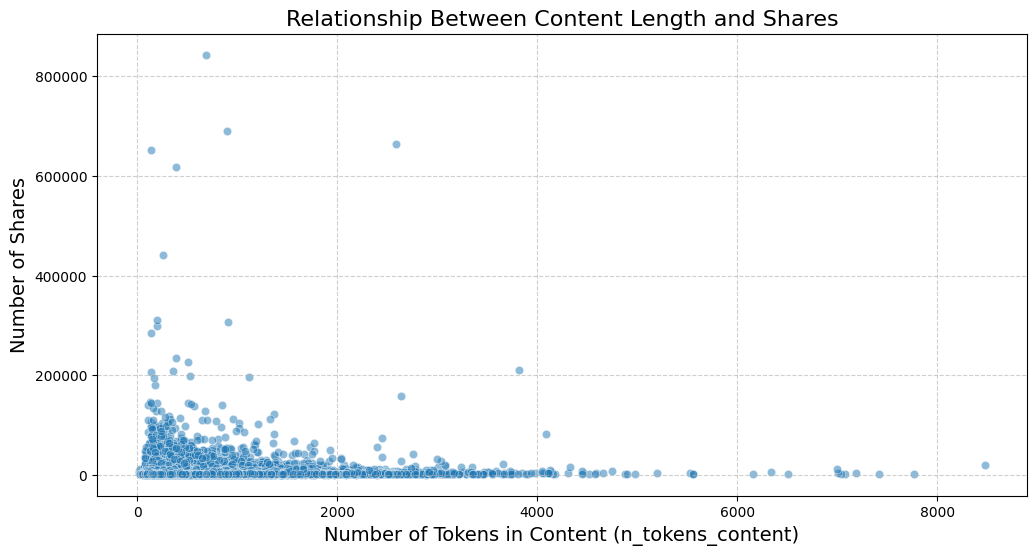

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset to ensure valid values for n_tokens_content and shares
filtered_data = data[(data['n_tokens_content'] > 0) & (data['shares'] > 0)]

# Plot the relationship between n_tokens_content and shares
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='n_tokens_content', y='shares', alpha=0.5)

# Add title and labels
plt.title('Relationship Between Content Length and Shares', fontsize=16)
plt.xlabel('Number of Tokens in Content (n_tokens_content)', fontsize=14)
plt.ylabel('Number of Shares', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


### 2. Examine how the number of images (num_imgs) and videos (num_videos) influence the shares.

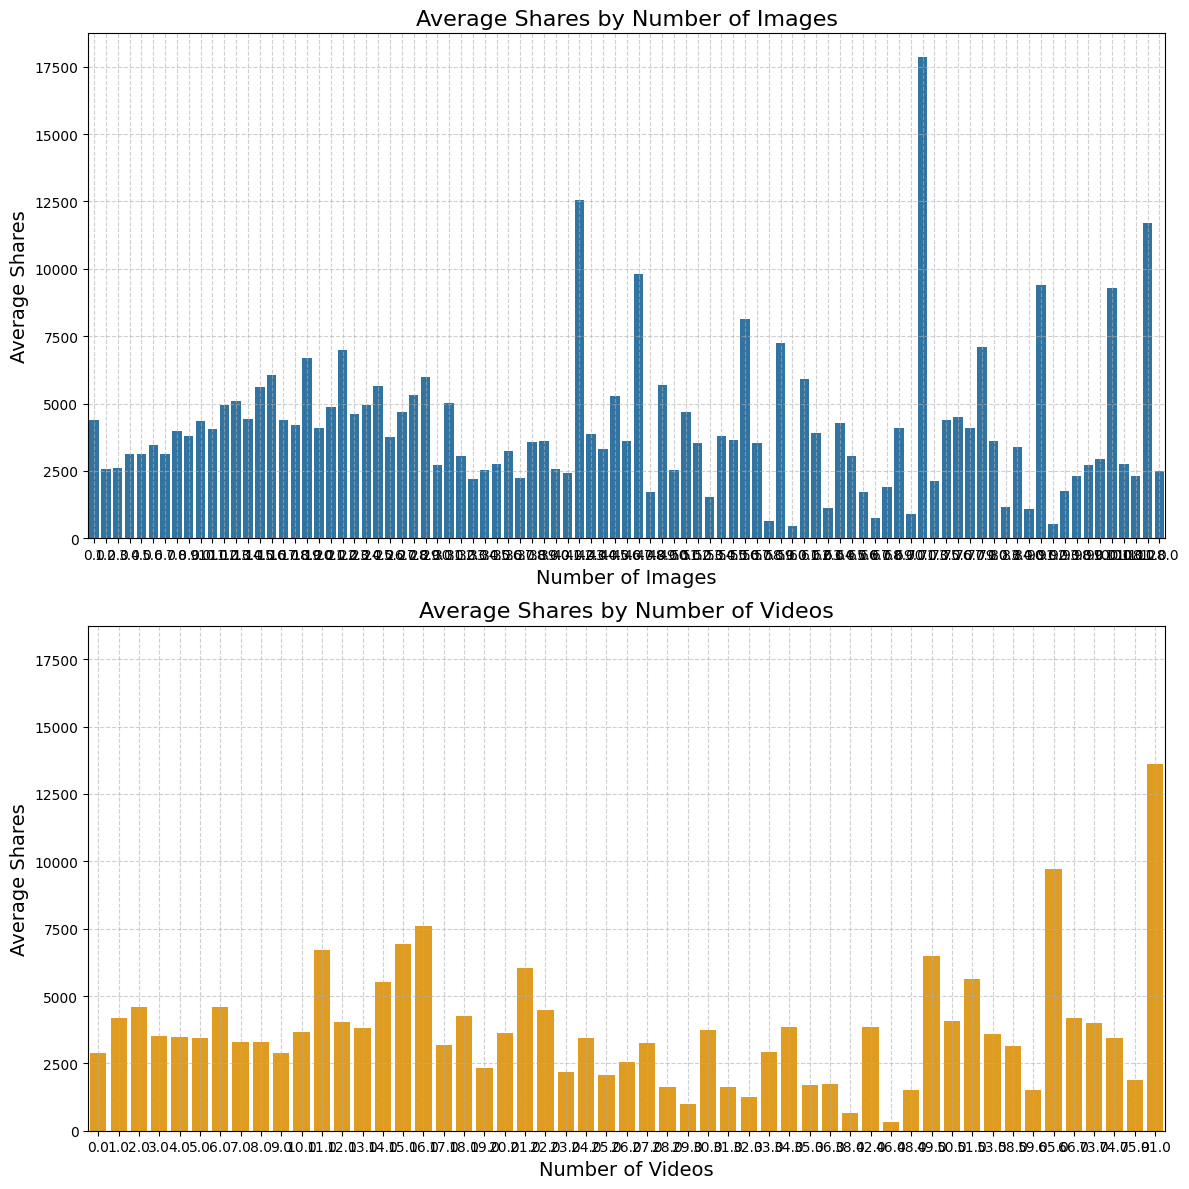

In [10]:
# Filter the dataset to ensure valid values for num_imgs, num_videos, and shares
filtered_data_media = data[(data['num_imgs'] >= 0) & (data['num_videos'] >= 0) & (data['shares'] > 0)]

# Aggregate data to analyze average shares by number of images and videos
avg_shares_imgs = filtered_data_media.groupby('num_imgs')['shares'].mean()
avg_shares_videos = filtered_data_media.groupby('num_videos')['shares'].mean()

# Create subplots for better visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharey=True)

# Bar plot for number of images vs average shares
sns.barplot(x=avg_shares_imgs.index, y=avg_shares_imgs.values, ax=ax[0])
ax[0].set_title('Average Shares by Number of Images', fontsize=16)
ax[0].set_xlabel('Number of Images', fontsize=14)
ax[0].set_ylabel('Average Shares', fontsize=14)
ax[0].grid(True, linestyle='--', alpha=0.6)

# Bar plot for number of videos vs average shares
sns.barplot(x=avg_shares_videos.index, y=avg_shares_videos.values, ax=ax[1], color='orange')
ax[1].set_title('Average Shares by Number of Videos', fontsize=16)
ax[1].set_xlabel('Number of Videos', fontsize=14)
ax[1].set_ylabel('Average Shares', fontsize=14)
ax[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()


### 3. Compare the average shares across weekdays (weekday_is_*) to identify trends. code for this problem statement

C:\Users\adira\AppData\Local\Temp\ipykernel_18952\2978116674.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_names, y=avg_shares_weekdays, palette="viridis")


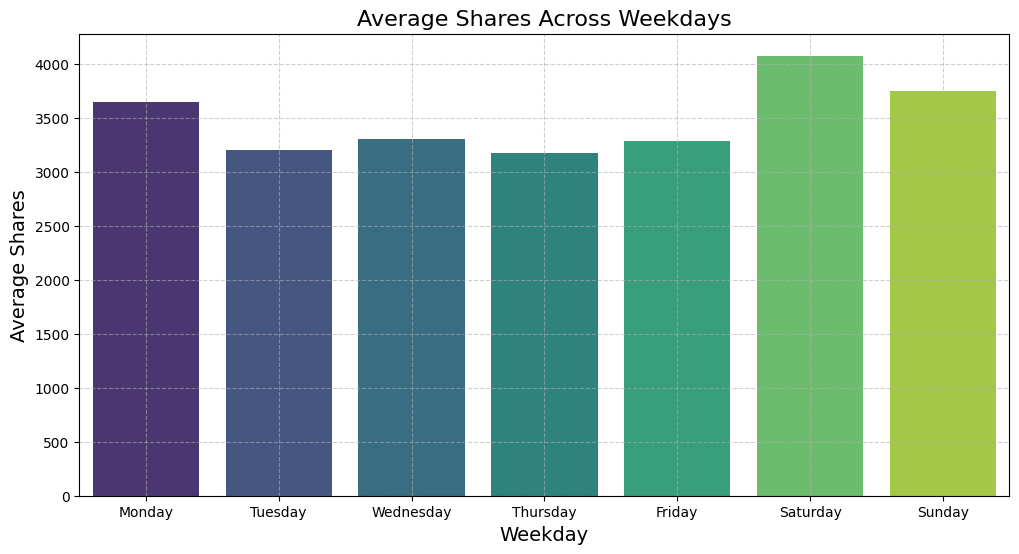

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset to ensure valid values for shares
filtered_data_weekday = data[data['shares'] > 0]

# Select the weekday columns and shares for analysis
weekday_columns = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
    'weekday_is_sunday'
]
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the average shares for each weekday
avg_shares_weekdays = [
    (filtered_data_weekday[col] * filtered_data_weekday['shares']).sum() / filtered_data_weekday[col].sum()
    for col in weekday_columns
]

# Create a bar plot to visualize the average shares across weekdays
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_names, y=avg_shares_weekdays, palette="viridis")

# Add titles and labels
plt.title('Average Shares Across Weekdays', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Average Shares', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


### 4. Analyze the relationship between the number of keywords (num_keywords) and article popularity (shares).

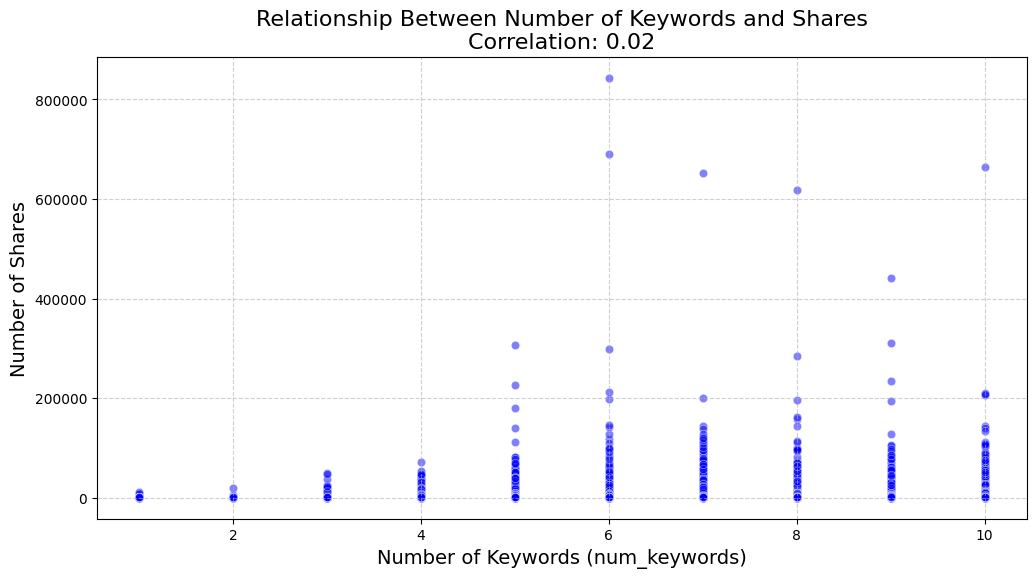

In [13]:
# Filter the dataset to ensure valid values for num_keywords and shares
filtered_data_keywords = data[(data['num_keywords'] > 0) & (data['shares'] > 0)]

# Calculate the correlation between num_keywords and shares
correlation = filtered_data_keywords['num_keywords'].corr(filtered_data_keywords['shares'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data_keywords, x='num_keywords', y='shares', alpha=0.5, color='blue')

# Add title and labels
plt.title(f'Relationship Between Number of Keywords and Shares\nCorrelation: {correlation:.2f}', fontsize=16)
plt.xlabel('Number of Keywords (num_keywords)', fontsize=14)
plt.ylabel('Number of Shares', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()



### 5. Explore the contribution of different data channels (data_channel_is_*) to article shares. 

C:\Users\adira\AppData\Local\Temp\ipykernel_18952\1427986683.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_channel_names, y=average_shares_channels, palette="coolwarm")


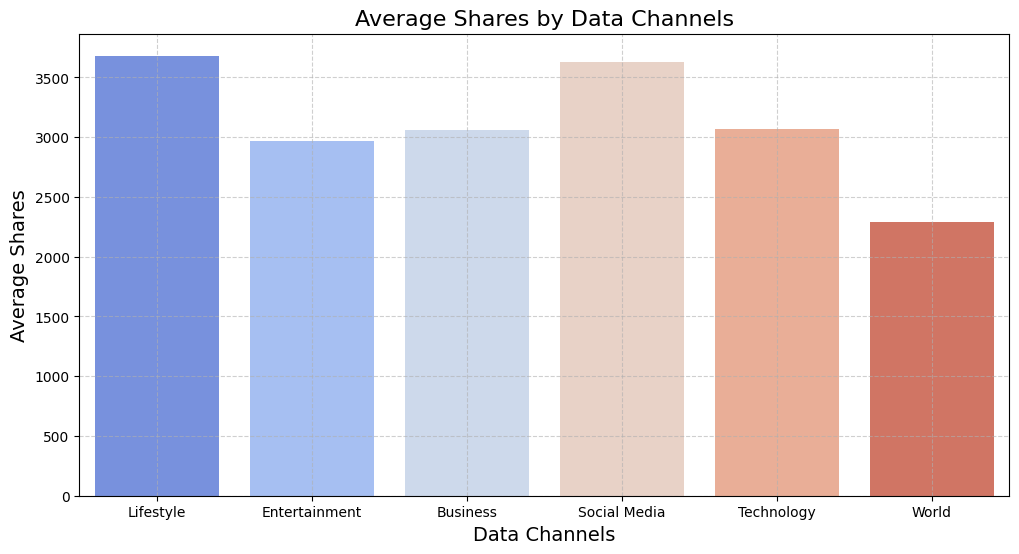

In [18]:
# Filter data for valid shares and data channels
filtered_data_channels = data[data['shares'] > 0]

# Select data channel columns and names
data_channel_columns = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed',
    'data_channel_is_tech', 'data_channel_is_world'
]
data_channel_names = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Technology', 'World']

# Calculate average shares for each data channel
average_shares_channels = [
    (filtered_data_channels[channel] * filtered_data_channels['shares']).sum() / filtered_data_channels[channel].sum()
    for channel in data_channel_columns
]

# Create a bar plot to visualize the contribution of data channels to shares
plt.figure(figsize=(12, 6))
sns.barplot(x=data_channel_names, y=average_shares_channels, palette="coolwarm")

# Add titles and labels
plt.title('Average Shares by Data Channels', fontsize=16)
plt.xlabel('Data Channels', fontsize=14)
plt.ylabel('Average Shares', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


### 6. Study how title sentiment polarity (title_sentiment_polarity) correlates with article popularity.

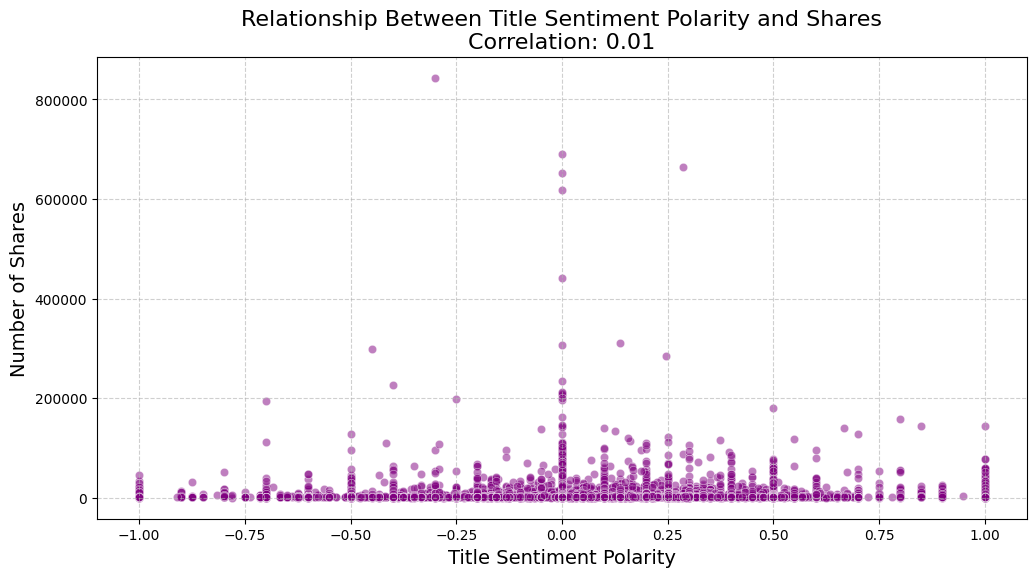

np.float64(0.012771873141514525)

In [19]:
# Filter data to ensure valid values for title sentiment polarity and shares
filtered_data_sentiment = data[(data['title_sentiment_polarity'].notnull()) & (data['shares'] > 0)]

# Calculate the correlation between title sentiment polarity and shares
sentiment_correlation = filtered_data_sentiment['title_sentiment_polarity'].corr(filtered_data_sentiment['shares'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=filtered_data_sentiment,
    x='title_sentiment_polarity',
    y='shares',
    alpha=0.5,
    color='purple'
)

# Add title and labels
plt.title(f'Relationship Between Title Sentiment Polarity and Shares\nCorrelation: {sentiment_correlation:.2f}', fontsize=16)
plt.xlabel('Title Sentiment Polarity', fontsize=14)
plt.ylabel('Number of Shares', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

sentiment_correlation


### 7. Calculate summary statistics (mean, median, min, max) for content length (n_tokens_content) and analyze its variation.

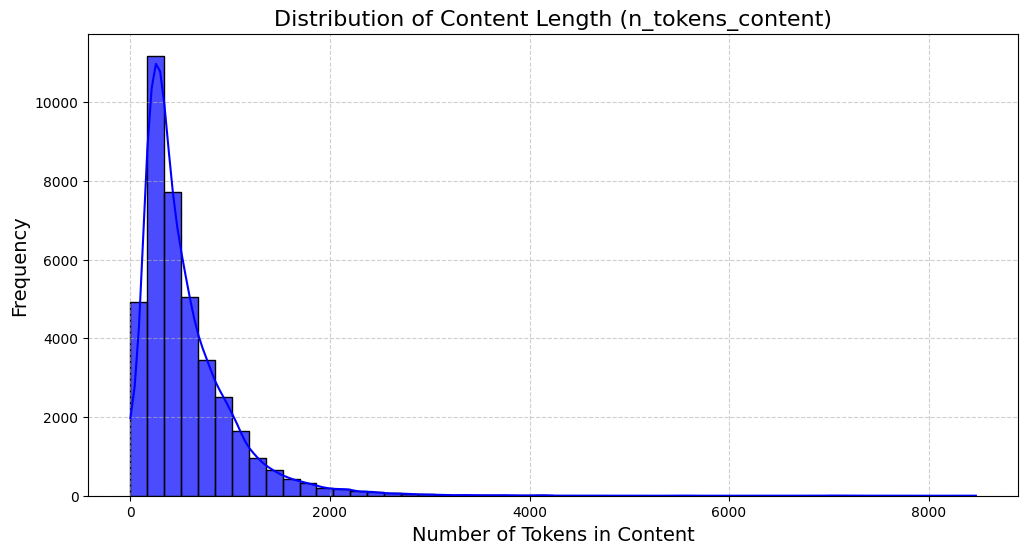

In [21]:
# Calculate summary statistics for content length (n_tokens_content)
summary_stats = {
    "Mean": data['n_tokens_content'].mean(),
    "Median": data['n_tokens_content'].median(),
    "Minimum": data['n_tokens_content'].min(),
    "Maximum": data['n_tokens_content'].max(),
}

# Display the summary statistics
summary_stats

# Plot the distribution of content length (n_tokens_content)
plt.figure(figsize=(12, 6))
sns.histplot(data['n_tokens_content'], bins=50, kde=True, color='blue', alpha=0.7)

# Add title and labels
plt.title('Distribution of Content Length (n_tokens_content)', fontsize=16)
plt.xlabel('Number of Tokens in Content', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()



In [23]:
# Calculate the interquartile range (IQR) for identifying outliers
Q1 = data['n_tokens_content'].quantile(0.25)
Q3 = data['n_tokens_content'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['n_tokens_content'] < lower_bound) | (data['n_tokens_content'] > upper_bound)]

# Display the number of outliers and a sample
num_outliers = outliers.shape[0]
outliers_sample = outliers[['n_tokens_content', 'shares']].head(10)

num_outliers, outliers_sample


(1933,
      n_tokens_content  shares
 140            1455.0     417
 141            1596.0    1600
 316            1438.0    1900
 336            1821.0    9700
 393            1579.0    1200
 415            1550.0    2200
 434            1475.0    6800
 529            1901.0   10400
 562            1964.0     438
 620            1827.0    5000)

### 8. Determine the subjectivity range (title_subjectivity) for the top 10% of articles based on shares

In [24]:

# Calculate the threshold for the top 10% of articles based on shares
top_10_percent_threshold = data['shares'].quantile(0.90)

# Filter the top 10% articles based on shares
top_10_percent_articles = data[data['shares'] >= top_10_percent_threshold]

# Calculate the range of title subjectivity for these articles
subjectivity_range = {
    "Minimum": top_10_percent_articles['title_subjectivity'].min(),
    "Maximum": top_10_percent_articles['title_subjectivity'].max(),
    "Mean": top_10_percent_articles['title_subjectivity'].mean(),
    "Median": top_10_percent_articles['title_subjectivity'].median(),
}

subjectivity_range


{'Minimum': np.float64(0.0),
 'Maximum': np.float64(1.0),
 'Mean': np.float64(0.32648807762312065),
 'Median': np.float64(0.274603174603)}

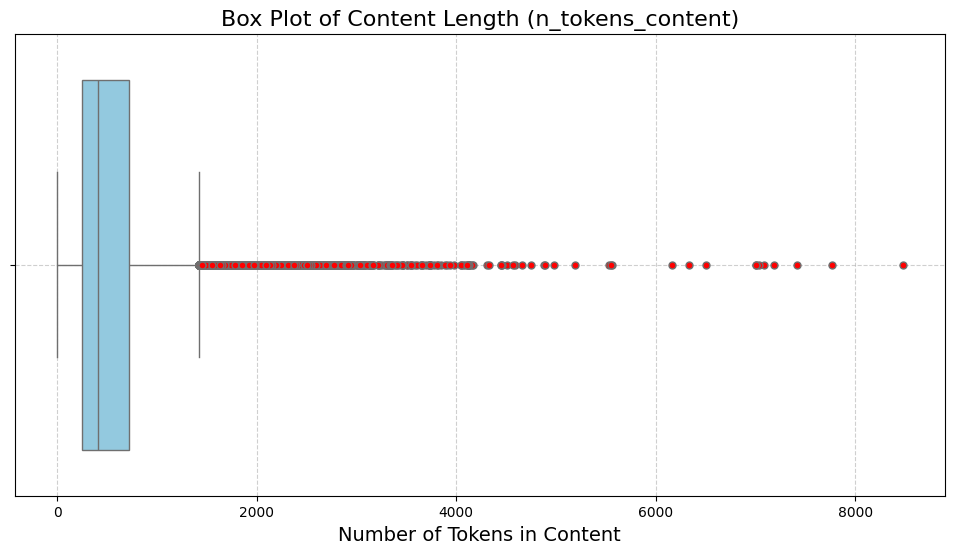

In [25]:
# Create a box plot to visualize outliers for content length
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='n_tokens_content', color='skyblue', flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 5})

# Add title and labels
plt.title('Box Plot of Content Length (n_tokens_content)', fontsize=16)
plt.xlabel('Number of Tokens in Content', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


### 9.Determine the articles that are outliers in the shares column (extremely high or low) and analyze their features.

In [26]:
# Calculate the interquartile range (IQR) for the shares column
Q1_shares = data['shares'].quantile(0.25)
Q3_shares = data['shares'].quantile(0.75)
IQR_shares = Q3_shares - Q1_shares

# Define outlier thresholds for shares
lower_bound_shares = Q1_shares - 1.5 * IQR_shares
upper_bound_shares = Q3_shares + 1.5 * IQR_shares

# Identify outliers in the shares column
shares_outliers = data[(data['shares'] < lower_bound_shares) | (data['shares'] > upper_bound_shares)]

# Display the number of outliers and a sample
num_shares_outliers = shares_outliers.shape[0]
shares_outliers_sample = shares_outliers[['n_tokens_content', 'shares', 'num_keywords', 'num_imgs', 'num_videos']].head()

num_shares_outliers, shares_outliers_sample


(4541,
     n_tokens_content  shares  num_keywords  num_imgs  num_videos
 13             285.0   10000           6.0       0.0        21.0
 16            1118.0   13600           5.0      12.0         1.0
 18             103.0    5700           6.0       1.0         0.0
 19            1207.0   17100           8.0      42.0         0.0
 36            1244.0    7700          10.0      20.0         0.0)

In [27]:
# Analyze key features of the outliers in the shares column
outliers_analysis = shares_outliers[['n_tokens_content', 'num_keywords', 'num_imgs', 'num_videos', 'shares']].describe()

# Correlation analysis to identify relationships between features for outliers
correlation_outliers = shares_outliers[['n_tokens_content', 'num_keywords', 'num_imgs', 'num_videos', 'shares']].corr()

outliers_analysis, correlation_outliers


(       n_tokens_content  num_keywords     num_imgs   num_videos         shares
 count       4541.000000   4541.000000  4541.000000  4541.000000    4541.000000
 mean         544.373706      7.412244     6.154371     1.730015   16717.726492
 std          531.587043      1.837823     9.683275     5.068061   31153.441166
 min            0.000000      1.000000     0.000000     0.000000    5600.000000
 25%          218.000000      6.000000     1.000000     0.000000    7000.000000
 50%          372.000000      7.000000     1.000000     0.000000    9800.000000
 75%          724.000000      9.000000    10.000000     1.000000   16300.000000
 max         8474.000000     10.000000   111.000000    91.000000  843300.000000,
                   n_tokens_content  num_keywords  num_imgs  num_videos  \
 n_tokens_content          1.000000      0.089840  0.267737    0.087116   
 num_keywords              0.089840      1.000000  0.123759   -0.011223   
 num_imgs                  0.267737      0.123759  1.0

## Conclusions: 

Rich media content (images/videos) seems slightly more common among high outliers, but their contribution to shares is weak.

Shorter articles dominate among outliers, suggesting concise content can perform well.

Shares are not strongly dependent on the number of keywords or content length, indicating other factors may influence virality.


C:\Users\adira\AppData\Local\Temp\ipykernel_18952\2156732887.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Weekends', 'Weekdays'], y=[average_shares_weekends, average_shares_weekdays], palette="viridis")


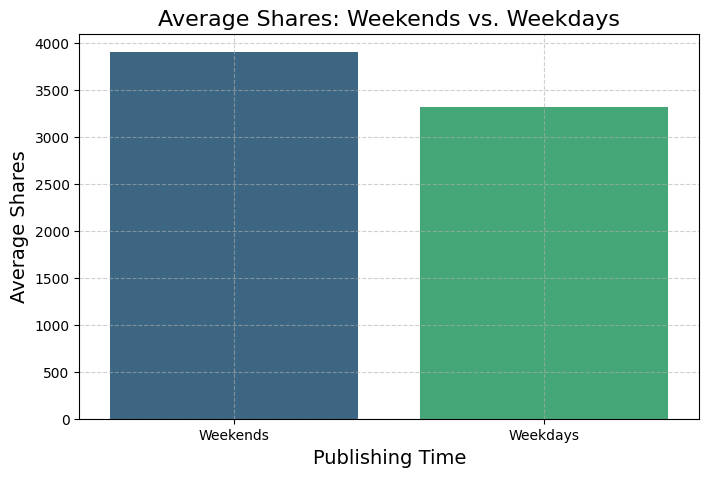

(np.float64(3903.3944123314063), np.float64(3318.855140186916))

In [28]:
# Calculate the average shares for articles posted on weekends and weekdays
average_shares_weekends = data[data['is_weekend'] == 1]['shares'].mean()
average_shares_weekdays = data[data['is_weekend'] == 0]['shares'].mean()

# Create a bar plot to compare the average shares
plt.figure(figsize=(8, 5))
sns.barplot(x=['Weekends', 'Weekdays'], y=[average_shares_weekends, average_shares_weekdays], palette="viridis")

# Add titles and labels
plt.title('Average Shares: Weekends vs. Weekdays', fontsize=16)
plt.ylabel('Average Shares', fontsize=14)
plt.xlabel('Publishing Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

average_shares_weekends, average_shares_weekdays


C:\Users\adira\AppData\Local\Temp\ipykernel_18952\3109617785.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_names, y=average_shares_by_day, palette="coolwarm")


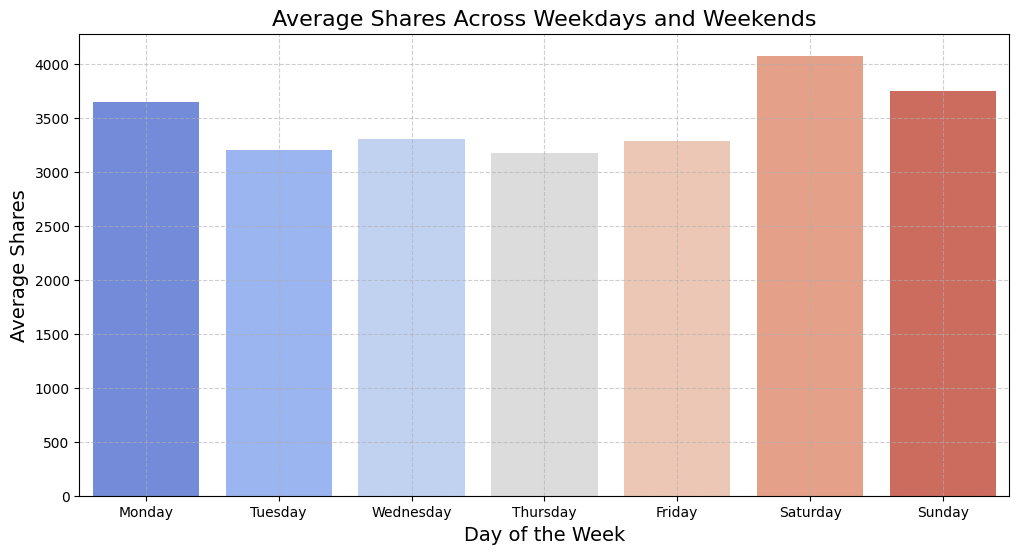

[np.float64(3647.0258219486564),
 np.float64(3202.5006765899866),
 np.float64(3303.4053799596504),
 np.float64(3178.5991468281272),
 np.float64(3285.181020873531),
 np.float64(4078.1850794944967),
 np.float64(3746.7405918889294)]

In [29]:
# Group by weekdays and calculate the average shares for each day
weekday_columns = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
    'weekday_is_sunday'
]
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate average shares for each weekday
average_shares_by_day = [
    (data[col] * data['shares']).sum() / data[col].sum()
    for col in weekday_columns
]

# Create a bar plot for average shares across all days of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_names, y=average_shares_by_day, palette="coolwarm")

# Add titles and labels
plt.title('Average Shares Across Weekdays and Weekends', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Shares', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

average_shares_by_day


###
Key Observations:
Articles posted on weekends (Saturday and Sunday) tend to have the highest average shares, with Saturday outperforming all other days.
Among weekdays, Monday has the highest average shares, possibly due to increased audience engagement at the start of the week.
Thursday has the lowest average shares, which might indicate a dip in engagement toward the end of the workweek.

### 10. Compare the average shares for articles posted on weekends (is_weekend) and weekdays.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Select features and target
features = ['n_tokens_content', 'num_keywords', 'title_sentiment_polarity']
X = data[features]
y = data['shares']

# Step 2: Handle missing values (if any)
X.fillna(0, inplace=True)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = lr_model.predict(X_test)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 3157.90
Root Mean Squared Error (RMSE): 10984.48
R^2 Score: 0.00


C:\Users\adira\AppData\Local\Temp\ipykernel_18952\1458202126.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Select features and target variable
features = ['n_tokens_content', 'num_keywords', 'title_sentiment_polarity', 
            'num_imgs', 'num_videos', 'is_weekend']
X = data[features]
y = data['shares']

# Step 2: Handle missing values
X.fillna(0, inplace=True)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


C:\Users\adira\AppData\Local\Temp\ipykernel_18952\284989063.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Mean Absolute Error (MAE): 3514.88
Root Mean Squared Error (RMSE): 11593.72
R^2 Score: -0.11


### Engagement Level Estimation: Apply linear regression to estimate the expected number of shares based on early article performance (e.g., initial comments or views).

In [11]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Prepare the feature set (X) and target variable (y)
X = data[selected_features]
y = data['shares']  # Engagement level represented by the number of shares

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 120087702.44225118
R-squared (R2): 0.004840666525527837


## Title Sentiment and Popularity: Use logistic regression to predict whether an article will be popular based on its title sentiment score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Select title sentiment features for popularity prediction
selected_features = ['title_sentiment_polarity', 'title_subjectivity']
X = data[selected_features]
threshold = 1400
y = np.where(data['shares'] > threshold, 1, 0)  # 1 for popular, 0 for not popular

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Model Accuracy: 0.5278093076049943

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.69      0.60      4075
           1       0.52      0.36      0.43      3854

    accuracy                           0.53      7929
   macro avg       0.53      0.52      0.51      7929
weighted avg       0.53      0.53      0.51      7929



**Predicting share count based on media element combinations (images, videos, links) in articles**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select features and target
X = data[['num_imgs', 'num_videos', 'num_hrefs']]
y = data['shares']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
r_squared = model.score(X_test, y_test)
print("R-squared value for media elements predicting shares:", r_squared)


R-squared value for media elements predicting shares: 0.0028297583473890775


**Comparison between LDA topics and shares**

In [34]:


# Select the LDA topic columns and the target engagement column ('shares')
lda_columns = ['LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'shares']

# Calculate the correlation matrix
correlation_matrix = data[lda_columns].corr()

# Display the correlation of each LDA topic with shares
print("Correlation of LDA Topics with Shares:\n", correlation_matrix['shares'].sort_values(ascending=False))


Correlation of LDA Topics with Shares:
 shares    1.000000
LDA_03    0.083771
LDA_01   -0.010183
LDA_04   -0.016622
LDA_02   -0.059163
Name: shares, dtype: float64


**Category Engagement Patterns: Use decision trees to explore social media engagement patterns for different categories (e.g., Tech vs. Lifestyle) on weekdays vs. weekends.**

Model Accuracy: 0.6230293857989658

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62      4075
           1       0.61      0.64      0.62      3854

    accuracy                           0.62      7929
   macro avg       0.62      0.62      0.62      7929
weighted avg       0.62      0.62      0.62      7929



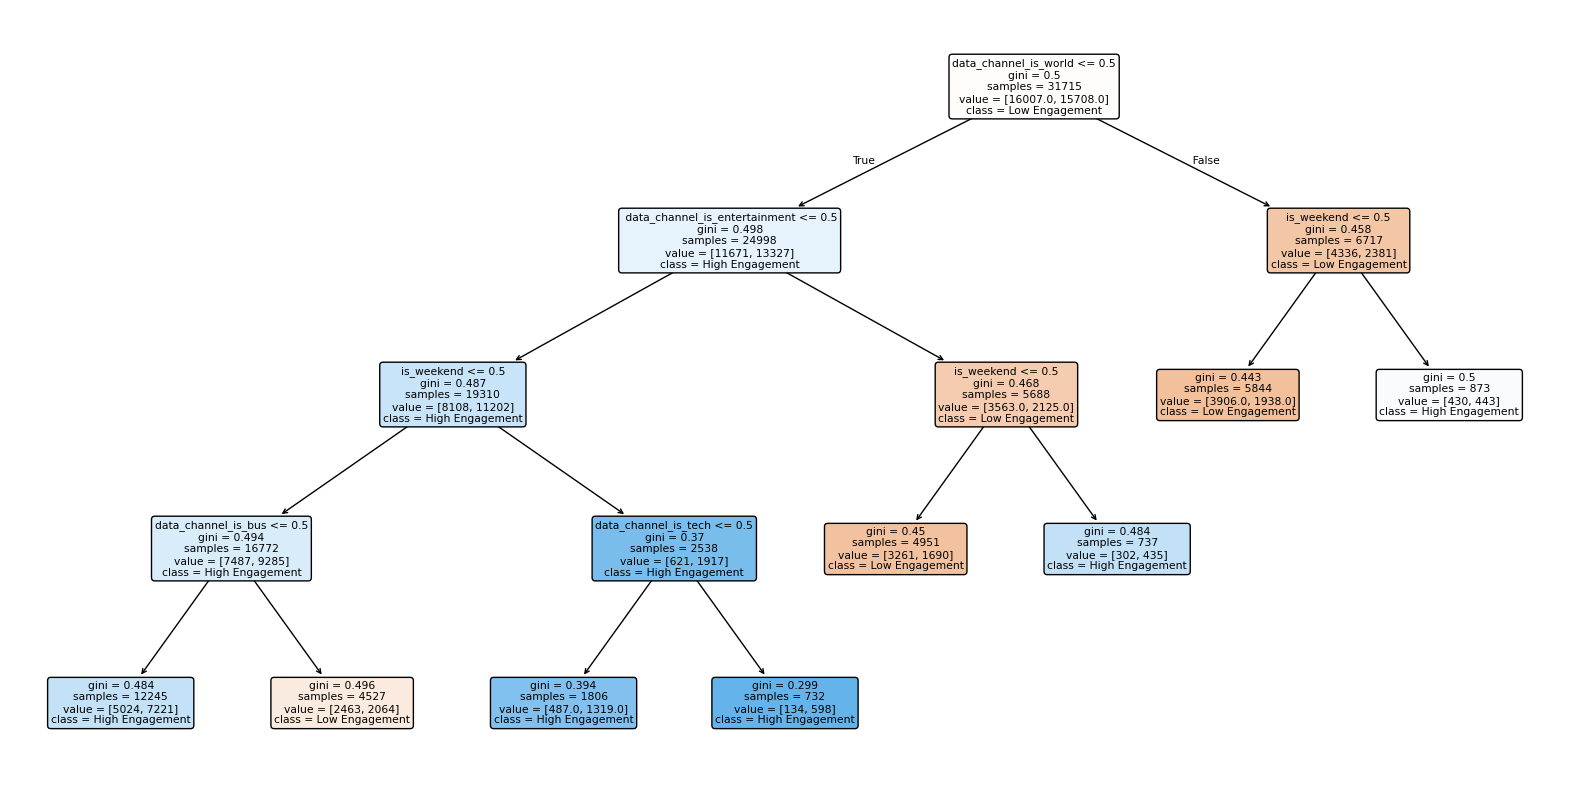

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define category indicators and 'is_weekend' as features
features = [
    'data_channel_is_lifestyle', ' data_channel_is_entertainment', 
    'data_channel_is_bus', 'data_channel_is_socmed', 
    'data_channel_is_tech', 'data_channel_is_world', 'is_weekend'
]

# Define high engagement vs. low engagement
# Set threshold for high engagement (e.g., articles with shares > 1400)
engagement_threshold = 1400
data['engagement_level'] = np.where(data['shares'] > engagement_threshold, 1, 0)  # 1 for high engagement, 0 for low engagement

# Prepare the feature set (X) and target variable (y)
X = data[features]
y = data['engagement_level']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(max_depth=4, random_state=42)  # max_depth is set for interpretability
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Visualize the Decision Tree (Optional, if you want to interpret it visually)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=features, class_names=['Low Engagement', 'High Engagement'], filled=True, rounded=True)
plt.show()


**Content Element Association: Using associative learning (such as the Apriori algorithm), find patterns between content elements (e.g., keywords, images, and topics) that frequently co-occur in high-engagement articles. This could reveal combinations of elements that contribute to increased popularity.**

**Correlation between sentiment of an article and shareability**

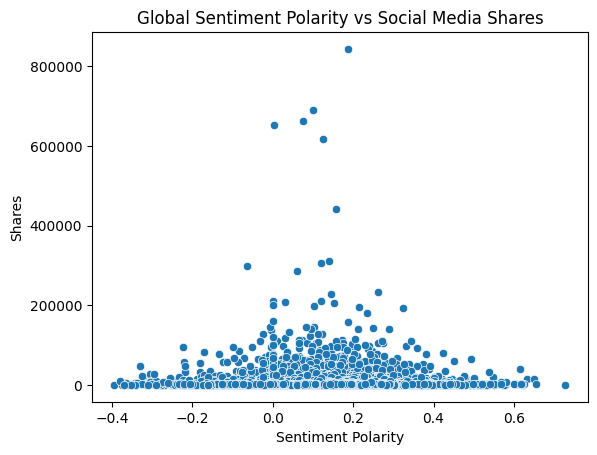

Correlation between sentiment and shares: 0.0041629290622772885


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between global sentiment polarity and shares
sns.scatterplot(x=data['global_sentiment_polarity'], y=data['shares'])
plt.title('Global Sentiment Polarity vs Social Media Shares')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Shares')
plt.show()

# Pearson correlation coefficient
correlation_sentiment_shares = data['global_sentiment_polarity'].corr(data['shares'])
print(f'Correlation between sentiment and shares: {correlation_sentiment_shares}')


**Engagement difference between articles published on weekends vs weekdays**

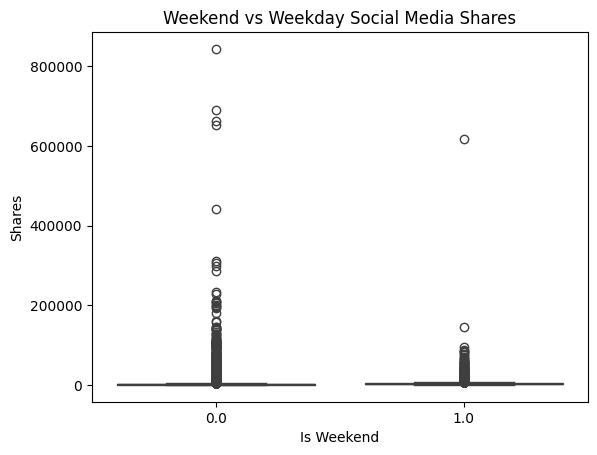

Average shares on weekends: 3903.3944123314063, on weekdays: 3318.855140186916


In [54]:
# Boxplot to compare weekend vs weekday shares
sns.boxplot(x=data['is_weekend'], y=data['shares'])
plt.title('Weekend vs Weekday Social Media Shares')
plt.xlabel('Is Weekend')
plt.ylabel('Shares')
plt.show()

# Grouping by weekend and getting average shares
avg_weekend_shares = data.groupby('is_weekend')['shares'].mean()
print(f'Average shares on weekends: {avg_weekend_shares[1]}, on weekdays: {avg_weekend_shares[0]}')

**Influence of videos in an article on company shares